In [1]:
# import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.utils import resample

In [2]:
#import the csv files
# drugsHourly = pd.read_csv(r'C:\Users\ariki\OneDrive\שולחן העבודה\Drugs_Hourly_vaso_demo.csv', encoding = 'ISO-8859-1',)
drugsHourly = pd.read_csv(r'Drugs_Hourly.csv', encoding = 'ISO-8859-1',)
# deadAlive = pd.read_csv(r'C:\Users\ariki\OneDrive\שולחן העבודה\ver12_proj3_outcomes_3-7_demo.csv', encoding = 'ISO-8859-1',)
deadAlive = pd.read_csv(r'ver15.csv', encoding = 'ISO-8859-1',)
ABGLabsHourly = pd.read_csv(r'Labs_Hourly_10_11.csv', encoding = 'ISO-8859-1')
vitalHourly = pd.read_csv(r'vital_hourly_10.11.csv', encoding = 'ISO-8859-1')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4,5,6,7,8,10,11,12,13,14,15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# drop unnecessary columns in the deadAlive table.
deadAlive = deadAlive[['patient_id', 'ICU_LOS', 'LOS_Group', 'ICU_mortality', 'Sepsis']]
deadAlive = deadAlive[deadAlive['Sepsis'] == 1]
deadAlive.drop(['Sepsis'], axis=1, inplace=True)

lst = []
# remove all patients who doesn't have ICU_moratality
allID = deadAlive.patient_id.unique()
for i in allID:
    dfID = deadAlive[deadAlive.patient_id==i]
    noNor = dfID[dfID["ICU_mortality"].isnull()]
    if(dfID.shape[0]==noNor.shape[0]):
        deadAlive = deadAlive[deadAlive.patient_id!=i]
        lst.append(deadAlive.patient_id)
        
deadAlive = deadAlive.reset_index(drop=True)
deadAlive.info()
# print(lst)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   patient_id     1400 non-null   object
 1   ICU_LOS        1400 non-null   int64 
 2   LOS_Group      1400 non-null   object
 3   ICU_mortality  1400 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 43.9+ KB


In [4]:
# drop unnecessary columns in the drugsHourly table.
drugsHourly = drugsHourly[['patient_id', 'hour_counter', 'Noradrenaline (Norepinephrine)']]

# remove all patients who didn't get Noradrenaline
allID = drugsHourly.patient_id.unique()
for i in allID:
    dfID = drugsHourly[drugsHourly.patient_id==i]
    noNor = dfID[dfID["Noradrenaline (Norepinephrine)"]==0]
    if(dfID.shape[0]==noNor.shape[0]):
        drugsHourly = drugsHourly[drugsHourly.patient_id!=i]
        
drugsHourly = drugsHourly.reset_index(drop=True)
drugsHourly['hour_counter'] = pd.to_numeric(drugsHourly['hour_counter'])
drugsHourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437884 entries, 0 to 437883
Data columns (total 3 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   patient_id                      437884 non-null  object 
 1   hour_counter                    437884 non-null  int64  
 2   Noradrenaline (Norepinephrine)  437884 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.0+ MB


In [5]:
# drugs table has negative values in the hour_counter column
for i in range (0, int(drugsHourly.size/drugsHourly.columns.size)):
    if(drugsHourly.loc[i, 'hour_counter'] < 0):
        print("Negative")
        break;

Negative


In [6]:
# drop unnecessary columns in the ABGLabsHourly table.
# We drop all the "duplicate patients_id".
ABGLabsHourly = ABGLabsHourly[['ParameterID', 'Unnamed: 5', '6834-1']]
ABGLabsHourly = ABGLabsHourly.drop([0,1], axis=0)
ABGLabsHourly = ABGLabsHourly.reset_index(drop=True)
ABGLabsHourly.rename(columns={'ParameterID':'patient_id', 'Unnamed: 5':'hour_counter', '6834-1':'LactateABG-1'}, inplace=True)
ABGLabsHourly = ABGLabsHourly[:110900]

# remove all patients who doesn't have LactateABG-1
allID = ABGLabsHourly.patient_id.unique()
for i in allID:
    dfID = ABGLabsHourly[ABGLabsHourly.patient_id==i]
    noNor = dfID[dfID["LactateABG-1"].isnull()]
    if(dfID.shape[0]==noNor.shape[0]):
        ABGLabsHourly = ABGLabsHourly[ABGLabsHourly.patient_id!=i]
        
ABGLabsHourly = ABGLabsHourly.reset_index(drop=True)
ABGLabsHourly['hour_counter'] = pd.to_numeric(ABGLabsHourly['hour_counter'])
ABGLabsHourly['LactateABG-1'] = pd.to_numeric(ABGLabsHourly['LactateABG-1'])
ABGLabsHourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110851 entries, 0 to 110850
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   patient_id    110851 non-null  object 
 1   hour_counter  110851 non-null  int64  
 2   LactateABG-1  101609 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ MB


In [7]:
# fill the nan values in the ABGLabsHourly table 
for i in range (0, int(ABGLabsHourly.size/ABGLabsHourly.columns.size)):  
    if(not math.isnan(ABGLabsHourly.loc[i,'LactateABG-1'])):
        temp = ABGLabsHourly.at[i,'LactateABG-1']
        temp1 = ABGLabsHourly.at[i, 'patient_id']
    else:
        if(temp1 == ABGLabsHourly.at[i, 'patient_id']):
            ABGLabsHourly.at[i,'LactateABG-1'] = temp

count = 0
for i in range (0, int(ABGLabsHourly.size/ABGLabsHourly.columns.size)):  
    if(not math.isnan(ABGLabsHourly.loc[i,'LactateABG-1'])):
        temp = ABGLabsHourly.at[i,'LactateABG-1']
        for j in range(0, count):
            ABGLabsHourly.at[i - j - 1 ,'LactateABG-1'] = temp
        count = 0
    else:
        count = count + 1
ABGLabsHourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110851 entries, 0 to 110850
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   patient_id    110851 non-null  object 
 1   hour_counter  110851 non-null  int64  
 2   LactateABG-1  110851 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ MB


In [8]:
# ABGLabsHourly table has no!! negative values in the hour_counter column
for i in range (0, int(ABGLabsHourly.size/ABGLabsHourly.columns.size)):
    if(ABGLabsHourly.loc[i, 'hour_counter'] < 0):
        print("Negative")
        break;
print("No negative")

No negative


In [9]:
# drop unnecessary columns in the vitalHourly table.
vitalHourly = vitalHourly[['ParameterID', 'Unnamed: 5', '5433']]
vitalHourly = vitalHourly.drop([0,1], axis=0)
vitalHourly = vitalHourly.reset_index(drop=True)
vitalHourly.rename(columns={'ParameterID':'patient_id', 'Unnamed: 5':'hour_counter', '5433':'ArtBPM'}, inplace=True)
vitalHourly = vitalHourly.drop_duplicates(subset=['patient_id','hour_counter'], keep='first')
vitalHourly = vitalHourly.reset_index(drop=True)
# lstVital = []
# remove all patients who doesn't have ArtBPM
allID = vitalHourly.patient_id.unique()
for i in allID:
    dfID = vitalHourly[vitalHourly.patient_id==i]
    noNor = dfID[dfID["ArtBPM"].isnull()]
    if(dfID.shape[0]==noNor.shape[0]):
        vitalHourly = vitalHourly[vitalHourly.patient_id!=i]
vitalHourly = vitalHourly.reset_index(drop=True)
vitalHourly['hour_counter'] = pd.to_numeric(vitalHourly['hour_counter'])
vitalHourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843485 entries, 0 to 843484
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   patient_id    843485 non-null  object
 1   hour_counter  843485 non-null  int64 
 2   ArtBPM        699963 non-null  object
dtypes: int64(1), object(2)
memory usage: 19.3+ MB


In [10]:
# fill the nan values in the vitalHourly table
vitalHourly['ArtBPM'] = pd.to_numeric(vitalHourly['ArtBPM'])
for i in range (0, int(vitalHourly.size/vitalHourly.columns.size)):  
    if(not math.isnan(vitalHourly.loc[i,'ArtBPM'])):
        temp = vitalHourly.at[i,'ArtBPM']
        temp1 = vitalHourly.at[i, 'patient_id']
    else:
        if(temp1 == vitalHourly.at[i, 'patient_id']):
            vitalHourly.at[i,'ArtBPM'] = temp

count = 0
for i in range (0, int(vitalHourly.size/vitalHourly.columns.size)):  
    if(not math.isnan(vitalHourly.loc[i,'ArtBPM'])):
        temp = vitalHourly.at[i,'ArtBPM']
        for j in range(0, count):
            vitalHourly.at[i - j - 1 ,'ArtBPM'] = temp
        count = 0
    else:
        count = count + 1
vitalHourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843485 entries, 0 to 843484
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   patient_id    843485 non-null  object 
 1   hour_counter  843485 non-null  int64  
 2   ArtBPM        843485 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 19.3+ MB


In [11]:
# vitalHourly table has no!! negative values in the hour_counter column
for i in range (0, int(vitalHourly.size/vitalHourly.columns.size)):
    if(vitalHourly.loc[i, 'hour_counter'] < 0):
        print("Negative")
        break;
print("no negative")        

no negative


In [12]:
# merge the drugsHourly and deadAlive into one table - merged_df
merged_df = pd.merge(drugsHourly, vitalHourly,  on=['patient_id','hour_counter'], how='outer', indicator=True)
merged_df.drop(['_merge'], axis=1, inplace=True)
merged_df.info()
# merged_df.head(55)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850554 entries, 0 to 850553
Data columns (total 4 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   patient_id                      850554 non-null  object 
 1   hour_counter                    850554 non-null  int64  
 2   Noradrenaline (Norepinephrine)  437884 non-null  float64
 3   ArtBPM                          843485 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 32.4+ MB


In [13]:
# merge merged_df and vitalHourly into one table  - merged_df1
merged_df1 = pd.merge(merged_df, ABGLabsHourly, on=['patient_id','hour_counter'], how='outer',indicator=False)
merged_df1.reset_index(drop=True)
merged_df1.info()
# merged_df1.head(60)

# sort to the hour counter column
merged_df1 = merged_df1.sort_values(by=['patient_id', 'hour_counter'])
merged_df1 = merged_df1.drop_duplicates(subset=['patient_id','hour_counter'], keep='first')
merged_df1 = merged_df1.reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 853250 entries, 0 to 853249
Data columns (total 5 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   patient_id                      853250 non-null  object 
 1   hour_counter                    853250 non-null  int64  
 2   Noradrenaline (Norepinephrine)  439546 non-null  float64
 3   ArtBPM                          845884 non-null  float64
 4   LactateABG-1                    110851 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 39.1+ MB


In [14]:
# merge merged_df1 and ABGLabsHourly into one final table - sepsis
sepsis = pd.merge(merged_df1, deadAlive, on=['patient_id'], how='outer', indicator=False)
sepsis.info()

# sort to the hour counter column
sepsis = sepsis.sort_values(by=['patient_id', 'hour_counter'])
sepsis = sepsis.reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850845 entries, 0 to 850844
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   patient_id                      850845 non-null  object 
 1   hour_counter                    850843 non-null  float64
 2   Noradrenaline (Norepinephrine)  437884 non-null  float64
 3   ArtBPM                          843485 non-null  float64
 4   LactateABG-1                    108444 non-null  float64
 5   ICU_LOS                         482493 non-null  float64
 6   LOS_Group                       482493 non-null  object 
 7   ICU_mortality                   482493 non-null  float64
dtypes: float64(6), object(2)
memory usage: 58.4+ MB


In [15]:
# remove lines where hour_counter>0
sepsis = sepsis[sepsis.hour_counter>0]
sepsis = sepsis.reset_index(drop=True)

In [16]:
# check if we have double rows of the samr hour
for i in range (1, int(sepsis.size/sepsis.columns.size)-1):
    if(sepsis.at[i,"hour_counter"] == sepsis.at[i+1,"hour_counter"]):
        print(i)

In [17]:
sepsis = sepsis.sort_values(by=['patient_id', 'hour_counter'])
sepsis = sepsis.reset_index(drop=True)

In [18]:
# check how much patients are in the "sepsis" table without clean
print(len(allID))

3215


In [19]:
# take only the first 240 hours
sepsis = sepsis[sepsis.hour_counter <= 240]
sepsis = sepsis.reset_index(drop=True)

In [20]:
sepsis.head(60)

,patient_id,hour_counter,Noradrenaline (Norepinephrine),ArtBPM,LactateABG-1,ICU_LOS,LOS_Group,ICU_mortality
0,0001F70C-AA4C-46CC-8386-9A4D778B26BA,1.0,1.1286,75.00000,NaN,19.0,LOS_14_and_more,0.0
1,0001F70C-AA4C-46CC-8386-9A4D778B26BA,2.0,1.6395,72.00000,NaN,19.0,LOS_14_and_more,0.0
2,0001F70C-AA4C-46CC-8386-9A4D778B26BA,3.0,2.1589,84.99999,NaN,19.0,LOS_14_and_more,0.0
3,0001F70C-AA4C-46CC-8386-9A4D778B26BA,4.0,2.2260,62.00000,19.0,19.0,LOS_14_and_more,0.0
4,0001F70C-AA4C-46CC-8386-9A4D778B26BA,5.0,2.2203,73.00000,NaN,19.0,LOS_14_and_more,0.0
5,0001F70C-AA4C-46CC-8386-9A4D778B26BA,6.0,2.2200,81.99996,NaN,19.0,LOS_14_and_more,0.0
6,0001F70C-AA4C-46CC-8386-9A4D778B26BA,7.0,2.2200,80.99998,NaN,19.0,LOS_14_and_more,0.0
7,0001F70C-AA4C-46CC-8386-9A4D778B26BA,8.0,2.2200,73.00000,NaN,19.0,LOS_14_and_more,0.0
8,0001F70C-AA4C-46CC-8386-9A4D778B26BA,9.0,2.1875,67.00000,13.0,19.0,LOS_14_and_more,0.0
9,0001F70C-AA4C-46CC-8386-9A4D778B26BA,10.0,2.0700,79.00002,NaN,19.0,LOS_14_and_more,0.0


In [21]:
# fill the nan values with the closest value(fill with the first hour that has value untill we find another value)
sepsis['ArtBPM'] = pd.to_numeric(sepsis['ArtBPM'])
temp1 = ""
for i in range (0, int(sepsis.size/sepsis.columns.size)):  
    if(not math.isnan(sepsis.loc[i,'ArtBPM'])):
        temp = sepsis.at[i,'ArtBPM']
        temp1 = sepsis.at[i, 'patient_id']
    else:
        if(temp1 == sepsis.at[i, 'patient_id']):
            sepsis.at[i,'ArtBPM'] = temp
sepsis['LactateABG-1'] = pd.to_numeric(sepsis['LactateABG-1'])
temp1 = ""
for i in range (0, int(sepsis.size/sepsis.columns.size)):  
    if(not math.isnan(sepsis.loc[i,'LactateABG-1'])):
        temp = sepsis.at[i,'LactateABG-1']
        temp1 = sepsis.at[i, 'patient_id']
    else:
        if(temp1 == sepsis.at[i, 'patient_id']):
            sepsis.at[i,'LactateABG-1'] = temp
temp1 = ""            
for i in range (0, int(sepsis.size/sepsis.columns.size)):  
    if(not math.isnan(sepsis.loc[i,'ICU_mortality'])):
        temp = sepsis.at[i,'ICU_mortality']
        temp1 = sepsis.at[i, 'patient_id']
    else:
        if(temp1 == sepsis.at[i, 'patient_id']):
            sepsis.at[i,'ICU_mortality'] = temp

for i in range (0, int(sepsis.size/sepsis.columns.size)):  
    if(math.isnan(sepsis.loc[i,'Noradrenaline (Norepinephrine)'])):
        sepsis.at[i,'Noradrenaline (Norepinephrine)'] = 0.0
sepsis = sepsis.reset_index(drop=True)

In [22]:
sepsis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491632 entries, 0 to 491631
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   patient_id                      491632 non-null  object 
 1   hour_counter                    491632 non-null  float64
 2   Noradrenaline (Norepinephrine)  491632 non-null  float64
 3   ArtBPM                          491296 non-null  float64
 4   LactateABG-1                    482888 non-null  float64
 5   ICU_LOS                         254024 non-null  float64
 6   LOS_Group                       254024 non-null  object 
 7   ICU_mortality                   254024 non-null  float64
dtypes: float64(6), object(2)
memory usage: 30.0+ MB


In [23]:
sepsis.head(60)

,patient_id,hour_counter,Noradrenaline (Norepinephrine),ArtBPM,LactateABG-1,ICU_LOS,LOS_Group,ICU_mortality
0,0001F70C-AA4C-46CC-8386-9A4D778B26BA,1.0,1.1286,75.00000,NaN,19.0,LOS_14_and_more,0.0
1,0001F70C-AA4C-46CC-8386-9A4D778B26BA,2.0,1.6395,72.00000,NaN,19.0,LOS_14_and_more,0.0
2,0001F70C-AA4C-46CC-8386-9A4D778B26BA,3.0,2.1589,84.99999,NaN,19.0,LOS_14_and_more,0.0
3,0001F70C-AA4C-46CC-8386-9A4D778B26BA,4.0,2.2260,62.00000,19.0,19.0,LOS_14_and_more,0.0
4,0001F70C-AA4C-46CC-8386-9A4D778B26BA,5.0,2.2203,73.00000,19.0,19.0,LOS_14_and_more,0.0
5,0001F70C-AA4C-46CC-8386-9A4D778B26BA,6.0,2.2200,81.99996,19.0,19.0,LOS_14_and_more,0.0
6,0001F70C-AA4C-46CC-8386-9A4D778B26BA,7.0,2.2200,80.99998,19.0,19.0,LOS_14_and_more,0.0
7,0001F70C-AA4C-46CC-8386-9A4D778B26BA,8.0,2.2200,73.00000,19.0,19.0,LOS_14_and_more,0.0
8,0001F70C-AA4C-46CC-8386-9A4D778B26BA,9.0,2.1875,67.00000,13.0,19.0,LOS_14_and_more,0.0
9,0001F70C-AA4C-46CC-8386-9A4D778B26BA,10.0,2.0700,79.00002,13.0,19.0,LOS_14_and_more,0.0


In [24]:
#remove all patients who didn't have Lactate
allID = sepsis.patient_id.unique()
for i in allID:
    dfID = sepsis[sepsis.patient_id==i]
    noNor = dfID[dfID["LactateABG-1"].isnull()]
    if(dfID.shape[0]==noNor.shape[0]):
        sepsis = sepsis[sepsis.patient_id!=i]
print("1")
#remove all patients who didn't have ICU_mortality
allID = sepsis.patient_id.unique()
for i in allID:
    dfID = sepsis[sepsis.patient_id==i]
    noNor = dfID[dfID["ICU_mortality"].isnull()]
    if(dfID.shape[0]==noNor.shape[0]):
        sepsis = sepsis[sepsis.patient_id!=i]
print("2")
#remove all patients who didn't have ArtBPM
allID = sepsis.patient_id.unique()
for i in allID:
    dfID = sepsis[sepsis.patient_id==i]
    noNor = dfID[dfID["ArtBPM"].isnull()]
    if(dfID.shape[0]==noNor.shape[0]):
        sepsis = sepsis[sepsis.patient_id!=i]
print("3")
#remove all patients who didn't get Noradrenaline
allID = sepsis.patient_id.unique()
for i in allID:
    dfID = sepsis[sepsis.patient_id==i]
    noNor = dfID[dfID["Noradrenaline (Norepinephrine)"] == 0]
    if(dfID.shape[0]==noNor.shape[0]):
        sepsis = sepsis[sepsis.patient_id!=i]

1
2
3


In [25]:
sepsis = sepsis.reset_index(drop=True)
sepsis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199028 entries, 0 to 199027
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   patient_id                      199028 non-null  object 
 1   hour_counter                    199028 non-null  float64
 2   Noradrenaline (Norepinephrine)  199028 non-null  float64
 3   ArtBPM                          199019 non-null  float64
 4   LactateABG-1                    196529 non-null  float64
 5   ICU_LOS                         199028 non-null  float64
 6   LOS_Group                       199028 non-null  object 
 7   ICU_mortality                   199028 non-null  float64
dtypes: float64(6), object(2)
memory usage: 12.1+ MB


In [26]:
# fill the nan values with the closest value(fill with the first hour with the next values)
count = 0
for i in range (0, int(sepsis.size/sepsis.columns.size)):  
    if(not math.isnan(sepsis.loc[i,'ArtBPM'])):
        temp = sepsis.at[i,'ArtBPM']
        for j in range(0, count):
            sepsis.at[i - j - 1 ,'ArtBPM'] = temp
        count = 0
    else:
        count = count + 1
        

count = 0
for i in range (0, int(sepsis.size/sepsis.columns.size)):  
    if(not math.isnan(sepsis.loc[i,'LactateABG-1'])):
        temp = sepsis.at[i,'LactateABG-1']
        for j in range(0, count):
            sepsis.at[i - j - 1 ,'LactateABG-1'] = temp
        count = 0
    else:
        count = count + 1
        

In [27]:
sepsis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199028 entries, 0 to 199027
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   patient_id                      199028 non-null  object 
 1   hour_counter                    199028 non-null  float64
 2   Noradrenaline (Norepinephrine)  199028 non-null  float64
 3   ArtBPM                          199028 non-null  float64
 4   LactateABG-1                    199028 non-null  float64
 5   ICU_LOS                         199028 non-null  float64
 6   LOS_Group                       199028 non-null  object 
 7   ICU_mortality                   199028 non-null  float64
dtypes: float64(6), object(2)
memory usage: 12.1+ MB


In [28]:
sepsis.head(60)

,patient_id,hour_counter,Noradrenaline (Norepinephrine),ArtBPM,LactateABG-1,ICU_LOS,LOS_Group,ICU_mortality
0,0001F70C-AA4C-46CC-8386-9A4D778B26BA,1.0,1.1286,75.00000,19.0,19.0,LOS_14_and_more,0.0
1,0001F70C-AA4C-46CC-8386-9A4D778B26BA,2.0,1.6395,72.00000,19.0,19.0,LOS_14_and_more,0.0
2,0001F70C-AA4C-46CC-8386-9A4D778B26BA,3.0,2.1589,84.99999,19.0,19.0,LOS_14_and_more,0.0
3,0001F70C-AA4C-46CC-8386-9A4D778B26BA,4.0,2.2260,62.00000,19.0,19.0,LOS_14_and_more,0.0
4,0001F70C-AA4C-46CC-8386-9A4D778B26BA,5.0,2.2203,73.00000,19.0,19.0,LOS_14_and_more,0.0
5,0001F70C-AA4C-46CC-8386-9A4D778B26BA,6.0,2.2200,81.99996,19.0,19.0,LOS_14_and_more,0.0
6,0001F70C-AA4C-46CC-8386-9A4D778B26BA,7.0,2.2200,80.99998,19.0,19.0,LOS_14_and_more,0.0
7,0001F70C-AA4C-46CC-8386-9A4D778B26BA,8.0,2.2200,73.00000,19.0,19.0,LOS_14_and_more,0.0
8,0001F70C-AA4C-46CC-8386-9A4D778B26BA,9.0,2.1875,67.00000,13.0,19.0,LOS_14_and_more,0.0
9,0001F70C-AA4C-46CC-8386-9A4D778B26BA,10.0,2.0700,79.00002,13.0,19.0,LOS_14_and_more,0.0


In [29]:
# check how much patients are in the "sepsis" table
# check how much patients are in the "sepsis" table without clean
allID = sepsis.patient_id.unique()
alive = 0
dead = 0
for i in allID:
    dfID = sepsis[sepsis.patient_id==i]
#     print(dfID)
    ic = dfID["ICU_mortality"].mean()
#     print(ic)
    if(ic == 0.0):
        alive = alive + 1
    if(ic == 1.0):
        dead = dead + 1
print("Alive patients: ", alive)
print("Dead patients: ",  dead)
print("All patients: ", allID.size)

Alive patients:  688
Dead patients:  350
All patients:  1038


In [30]:
# create new df for the models
columns = ['patient_id','ICU_mortality']
df = pd.DataFrame(columns=columns)
# df.loc[0] = ['name', 0]
df

,patient_id,ICU_mortality


In [31]:
# take the first row from every patient
# fill the new data with all ids and their ICU_Mortality
# "df" is our new final table and now we gonna fill it
new_sepsis = sepsis.drop_duplicates(subset=['patient_id'], keep='first')
new_sepsis = new_sepsis.reset_index(drop=True)
j = 0
for i in range (0, int(new_sepsis.size/ new_sepsis.columns.size)):
    df.loc[j] = [new_sepsis.loc[i,'patient_id'] , new_sepsis.loc[i,'ICU_mortality']]
    j = j + 1

In [32]:
df.head(10)

,patient_id,ICU_mortality
0,0001F70C-AA4C-46CC-8386-9A4D778B26BA,0.0
1,004E2D79-7F96-431B-AA0E-3A6D5B90097D,0.0
2,00995CA1-5E8E-485B-B49D-B6730734CB50,0.0
3,00ED7319-79A7-4E56-A921-25474DC11058,1.0
4,00F1E480-63A6-4A48-A4E2-645251FEF8DC,1.0
5,01179531-3929-4BAA-BCCE-2991BD6F0C58,0.0
6,01547BBA-3C99-4EF6-A1A0-0FC71B8CB509,0.0
7,0213E41F-54C1-48EC-905B-56A303C24623,0.0
8,024AF2B4-9FB1-4EC4-AB35-145E2E2A9B06,0.0
9,0269E9F8-C94F-4C8A-ADD8-AD3DC1350063,0.0


In [33]:
def create_line_for_patient(k, df):
    df[f"{k}_Noradrenaline (Norepinephrine)"] = np.nan
    df[f"{k}_ArtBPM"] = np.nan
    df[f"{k}_LactateABG-1"] = np.nan
    sepsis3 = sepsis[sepsis['hour_counter'] == k]
    sepsis3 = sepsis3.reset_index(drop=True)
    for i in range (0, int(df.size/ df.columns.size)):
        sepsis4 = sepsis3[sepsis3['patient_id'] == df.loc[i,'patient_id']]
        sepsis4 = sepsis4.reset_index(drop=True)
        for j in range(0 , int(sepsis4.size/ sepsis4.columns.size)):
                df.at[i,f"{k}_ArtBPM"] = sepsis4.at[j,'ArtBPM']
                df.at[i,f"{k}_Noradrenaline (Norepinephrine)"] = sepsis4.at[j,'Noradrenaline (Norepinephrine)']
                df.at[i,f"{k}_LactateABG-1"] = sepsis4.at[j,'LactateABG-1']

In [34]:
sepsis['hour_counter'] = pd.to_numeric(sepsis['hour_counter'])
a = sepsis.iloc[sepsis.hour_counter.argmax(), 1]
print(a)

240.0


In [35]:
for i in range(1, int(a + 1)):
    create_line_for_patient(i , df)

In [36]:
df.head(10)

,patient_id,ICU_mortality,1_Noradrenaline (Norepinephrine),1_ArtBPM,1_LactateABG-1,2_Noradrenaline (Norepinephrine),2_ArtBPM,2_LactateABG-1,3_Noradrenaline (Norepinephrine),3_ArtBPM,...,237_LactateABG-1,238_Noradrenaline (Norepinephrine),238_ArtBPM,238_LactateABG-1,239_Noradrenaline (Norepinephrine),239_ArtBPM,239_LactateABG-1,240_Noradrenaline (Norepinephrine),240_ArtBPM,240_LactateABG-1
0,0001F70C-AA4C-46CC-8386-9A4D778B26BA,0.0,1.12860,75.00000,19.0,1.63950,72.00000,19.0,2.15890,84.99999,...,6.000000,0.0,69.00000,6.000000,0.0,72.00000,6.000000,0.0,67.00000,6.000000
1,004E2D79-7F96-431B-AA0E-3A6D5B90097D,0.0,0.00000,65.00000,15.0,0.00000,66.00000,15.0,0.07410,80.99998,...,5.000000,0.0,80.99998,5.000000,0.0,73.00000,5.000000,0.0,70.00000,5.000000
2,00995CA1-5E8E-485B-B49D-B6730734CB50,0.0,0.74050,74.00000,16.0,1.34740,74.00000,16.0,1.59960,74.00000,...,11.000000,0.0,85.99997,11.000000,0.0,85.99997,11.000000,0.0,95.00003,11.000000
3,00ED7319-79A7-4E56-A921-25474DC11058,1.0,0.73800,74.00000,14.0,0.73800,74.00000,14.0,0.83680,74.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00F1E480-63A6-4A48-A4E2-645251FEF8DC,1.0,0.00000,97.99998,14.0,0.00000,96.00002,14.0,0.00000,97.99998,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,01179531-3929-4BAA-BCCE-2991BD6F0C58,0.0,0.73800,78.00004,19.0,0.58152,87.00002,19.0,0.44460,100.00000,...,9.999999,0.0,76.99998,9.999999,0.0,79.00002,9.999999,0.0,80.99998,9.999999
6,01547BBA-3C99-4EF6-A1A0-0FC71B8CB509,0.0,0.52795,92.00002,6.0,0.29700,84.00001,5.0,0.29700,80.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0213E41F-54C1-48EC-905B-56A303C24623,0.0,0.17808,65.99999,8.0,0.22260,65.99999,8.0,0.22260,58.00000,...,9.999999,0.0,83.00002,9.999999,0.0,67.99999,9.999999,0.0,69.99999,9.999999
8,024AF2B4-9FB1-4EC4-AB35-145E2E2A9B06,0.0,0.83340,74.99999,8.0,0.80870,73.99998,8.0,0.55624,71.99999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0269E9F8-C94F-4C8A-ADD8-AD3DC1350063,0.0,0.22260,67.00000,9.0,0.22260,96.99999,9.0,0.22260,76.00000,...,5.000000,0.0,75.00000,5.000000,0.0,76.00000,5.000000,0.0,76.00000,5.000000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038 entries, 0 to 1037
Columns: 722 entries, patient_id to 240_LactateABG-1
dtypes: float64(721), object(1)
memory usage: 5.8+ MB


In [38]:
# 0 - alive
# 1 - dead
for i in range(1, 49):
    df = df[df[f'{i}_Noradrenaline (Norepinephrine)'].notnull()]
    df = df[df[f'{i}_LactateABG-1'].notnull()]
df.ICU_mortality.value_counts()

0.0    657
1.0    331
Name: ICU_mortality, dtype: int64

In [39]:
Nor = df[["1_Noradrenaline (Norepinephrine)", "2_Noradrenaline (Norepinephrine)", "3_Noradrenaline (Norepinephrine)"
         , "4_Noradrenaline (Norepinephrine)", "5_Noradrenaline (Norepinephrine)", "6_Noradrenaline (Norepinephrine)", 
         "7_Noradrenaline (Norepinephrine)", "8_Noradrenaline (Norepinephrine)", "9_Noradrenaline (Norepinephrine)",
         "10_Noradrenaline (Norepinephrine)", "11_Noradrenaline (Norepinephrine)", "12_Noradrenaline (Norepinephrine)"]]
artBPM = df[["1_ArtBPM", "2_ArtBPM", "3_ArtBPM", "4_ArtBPM", "5_ArtBPM", "6_ArtBPM", "7_ArtBPM", "8_ArtBPM", "9_ArtBPM",
         "10_ArtBPM", "11_ArtBPM", "12_ArtBPM"]]
ABG = df[["1_LactateABG-1", "2_LactateABG-1", "3_LactateABG-1", "4_LactateABG-1", "5_LactateABG-1", "6_LactateABG-1",
          "7_LactateABG-1", "8_LactateABG-1", "9_LactateABG-1", "10_LactateABG-1", "11_LactateABG-1", "12_LactateABG-1"]]

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
def stats(y_test,y_pred):
    accuracy=accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='binary')
    precision = precision_score(y_test, y_pred, average='binary')
    score = f1_score(y_test, y_pred, average='binary')
#     print('accuracy_score: %.3f' % accuracy)
    print('recall: %.3f' % recall)
    print('precision: %.3f' % precision)
    print('F-Measure: %.3f' % score)
    print('roc_auc_score: %.3f' % roc_auc_score(y_test,y_pred))

In [41]:
# balnce our data
# Separate majority and minority classes
df_majority = df[df.ICU_mortality == 0]
df_minority = df[df.ICU_mortality == 1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.ICU_mortality.value_counts()

1.0    657
0.0    657
Name: ICU_mortality, dtype: int64

In [42]:
def takefeature(number):
    s = ""
    for i in range(1, number):
        s = s + "'" + f'{i}_Noradrenaline (Norepinephrine)'+ "'"+ ','
    s = s + "'" + f'{number}_Noradrenaline (Norepinephrine)'+ "'"
    print(s)
    
takefeature(3)

'1_Noradrenaline (Norepinephrine)','2_Noradrenaline (Norepinephrine)','3_Noradrenaline (Norepinephrine)'


In [43]:
#Now seperate the dataset as response variable and feature variabes
from sklearn.model_selection import train_test_split, cross_val_score
feature = ['1_Noradrenaline (Norepinephrine)',
           '2_Noradrenaline (Norepinephrine)',
           '3_Noradrenaline (Norepinephrine)',
           '4_Noradrenaline (Norepinephrine)',
           '5_Noradrenaline (Norepinephrine)',
           '6_Noradrenaline (Norepinephrine)',
           '7_Noradrenaline (Norepinephrine)',
           '8_Noradrenaline (Norepinephrine)',
           '9_Noradrenaline (Norepinephrine)',
           '10_Noradrenaline (Norepinephrine)',
           '12_Noradrenaline (Norepinephrine)',
           '13_Noradrenaline (Norepinephrine)',
           '14_Noradrenaline (Norepinephrine)',
           '15_Noradrenaline (Norepinephrine)',
           '16_Noradrenaline (Norepinephrine)',
           '17_Noradrenaline (Norepinephrine)',
           '18_Noradrenaline (Norepinephrine)',
           '19_Noradrenaline (Norepinephrine)',
           '20_Noradrenaline (Norepinephrine)',
           '21_Noradrenaline (Norepinephrine)',
           '22_Noradrenaline (Norepinephrine)',
           '23_Noradrenaline (Norepinephrine)',
           '24_Noradrenaline (Norepinephrine)',
           '25_Noradrenaline (Norepinephrine)',
           '26_Noradrenaline (Norepinephrine)',
           '27_Noradrenaline (Norepinephrine)',
           '28_Noradrenaline (Norepinephrine)',
           '29_Noradrenaline (Norepinephrine)',
           '30_Noradrenaline (Norepinephrine)',
           '31_Noradrenaline (Norepinephrine)',
           '32_Noradrenaline (Norepinephrine)',
           '33_Noradrenaline (Norepinephrine)',
           '34_Noradrenaline (Norepinephrine)',
           '35_Noradrenaline (Norepinephrine)',
           '36_Noradrenaline (Norepinephrine)',
           '37_Noradrenaline (Norepinephrine)',
           '38_Noradrenaline (Norepinephrine)',
           '39_Noradrenaline (Norepinephrine)',
           '40_Noradrenaline (Norepinephrine)',
           '41_Noradrenaline (Norepinephrine)',
           '42_Noradrenaline (Norepinephrine)',
           '43_Noradrenaline (Norepinephrine)',
           '44_Noradrenaline (Norepinephrine)',
           '45_Noradrenaline (Norepinephrine)',
           '46_Noradrenaline (Norepinephrine)',
           '47_Noradrenaline (Norepinephrine)',
           '48_Noradrenaline (Norepinephrine)',
           '1_LactateABG-1',
           '2_LactateABG-1',
           '3_LactateABG-1',
           '4_LactateABG-1',
           '5_LactateABG-1',
           '6_LactateABG-1',
           '7_LactateABG-1',
           '8_LactateABG-1',
           '9_LactateABG-1',
           '10_LactateABG-1',
           
           '1_LactateABG-1',
           '2_LactateABG-1',
           '3_LactateABG-1',
           '4_LactateABG-1',
           '5_LactateABG-1',
           '6_LactateABG-1',
           '7_LactateABG-1',
           '8_LactateABG-1',
           '9_LactateABG-1',
           '10_LactateABG-1',
          
           '11_LactateABG-1',
           '12_LactateABG-1',
           '13_LactateABG-1',
           '14_LactateABG-1',
           '15_LactateABG-1',
           '16_LactateABG-1',
           '17_LactateABG-1',
           '18_LactateABG-1',
           '19_LactateABG-1',
           '20_LactateABG-1',
          
           '21_LactateABG-1',
           '22_LactateABG-1',
           '23_LactateABG-1',
           '24_LactateABG-1',
           '25_LactateABG-1',
           '26_LactateABG-1',
           '27_LactateABG-1',
           '28_LactateABG-1',
           '29_LactateABG-1',
           '30_LactateABG-1',
          
           '31_LactateABG-1',
           '32_LactateABG-1',
           '33_LactateABG-1',
           '34_LactateABG-1',
           '35_LactateABG-1',
           '36_LactateABG-1',
           '37_LactateABG-1',
           '38_LactateABG-1',
           '39_LactateABG-1',
           '40_LactateABG-1',
          
           '41_LactateABG-1',
           '42_LactateABG-1',
           '43_LactateABG-1',
           '44_LactateABG-1',
           '45_LactateABG-1',
           '46_LactateABG-1',
           '47_LactateABG-1',
           '48_LactateABG-1'
           ]
X = df[feature]
y = df['ICU_mortality']
#pre processing the values of the data to be in range [0, 1]
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
#Train and Test splitting of data 
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)
# X

In [44]:
# Separate input features (X) and target variable (y)
# y = df_upsampled.balance
# X = df_upsampled.drop('balance', axis=1)
 # import the class
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train model
clf_1 = LogisticRegression().fit(X, y)
 
# Predict on training set
pred_y_1 = clf_1.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_1 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_1) )
# 0.513888888889
stats(y, pred_y_1)

[0. 1.]
0.7064777327935222
recall: 0.227
precision: 0.688
F-Measure: 0.341
roc_auc_score: 0.587


In [45]:
from sklearn.svm import SVC

In [46]:
# Separate input features (X) and target variable (y) 
# Train model
clf_3 = SVC(kernel='linear', 
            class_weight='balanced', # penalize
            probability=True)
 
clf_3.fit(X, y)
 
# Predict on training set
pred_y_3 = clf_3.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_3 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_3) )
# 0.688


stats(y,pred_y_3)

[0. 1.]
0.7004048582995951
recall: 0.402
precision: 0.576
F-Measure: 0.473
roc_auc_score: 0.626


In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
# Train model
clf_4 =  RandomForestClassifier(n_estimators=200, max_depth=2)
clf_4.fit(X, y)
 
# Predict on training set
pred_y_4 = clf_4.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_4 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_4) )
# 0.9744

stats(y,pred_y_4)
# 0.999078798186

[0. 1.]
0.7074898785425101
recall: 0.230
precision: 0.691
F-Measure: 0.345
roc_auc_score: 0.589


In [49]:
# Train model
clf_4 =  RandomForestClassifier(n_estimators=200, max_depth=3)
clf_4.fit(X, y)
 
# Predict on training set
pred_y_4 = clf_4.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_4 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_4) )
# 0.9744

stats(y,pred_y_4)
# 0.999078798186

[0. 1.]
0.7338056680161943
recall: 0.278
precision: 0.793
F-Measure: 0.412
roc_auc_score: 0.621


In [50]:
# Train model
clf_4 =  RandomForestClassifier(n_estimators=200, max_depth=4)
clf_4.fit(X, y)
 
# Predict on training set
pred_y_4 = clf_4.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_4 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_4) )
# 0.9744

stats(y,pred_y_4)
# 0.999078798186

[0. 1.]
0.7550607287449392
recall: 0.323
precision: 0.856
F-Measure: 0.469
roc_auc_score: 0.648


In [51]:
# Train model
clf_4 =  RandomForestClassifier(n_estimators=200, max_depth=5)
clf_4.fit(X, y)
 
# Predict on training set
pred_y_4 = clf_4.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_4 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_4) )
# 0.9744

stats(y,pred_y_4)
# 0.999078798186

[0. 1.]
0.7834008097165992
recall: 0.375
precision: 0.947
F-Measure: 0.537
roc_auc_score: 0.682


In [52]:
# Train model
clf_4 =  RandomForestClassifier(n_estimators=200, max_depth=6)
clf_4.fit(X, y)
 
# Predict on training set
pred_y_4 = clf_4.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_4 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_4) )
# 0.9744

stats(y,pred_y_4)
# 0.999078798186

[0. 1.]
0.8097165991902834
recall: 0.441
precision: 0.980
F-Measure: 0.608
roc_auc_score: 0.718


In [53]:
# Train model
clf_4 =  RandomForestClassifier(n_estimators=200, max_depth=7)
clf_4.fit(X, y)
 
# Predict on training set
pred_y_4 = clf_4.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_4 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_4) )
# 0.9744

stats(y,pred_y_4)
# 0.999078798186

[0. 1.]
0.8441295546558705
recall: 0.535
precision: 1.000
F-Measure: 0.697
roc_auc_score: 0.767


In [54]:
# Train model
clf_4 =  RandomForestClassifier(n_estimators=200, max_depth=8)
clf_4.fit(X, y)
 
# Predict on training set
pred_y_4 = clf_4.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_4 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_4) )
# 0.9744

stats(y,pred_y_4)
# 0.999078798186

[0. 1.]
0.8795546558704453
recall: 0.640
precision: 1.000
F-Measure: 0.781
roc_auc_score: 0.820


In [55]:
# Train model
clf_4 =  RandomForestClassifier(n_estimators=200, max_depth=9)
clf_4.fit(X, y)
 
# Predict on training set
pred_y_4 = clf_4.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_4 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_4) )
# 0.9744

stats(y,pred_y_4)
# 0.999078798186

[0. 1.]
0.9038461538461539
recall: 0.713
precision: 1.000
F-Measure: 0.832
roc_auc_score: 0.856


In [56]:
# Train model
clf_4 =  RandomForestClassifier(n_estimators=200, max_depth=10)
clf_4.fit(X, y)
 
# Predict on training set
pred_y_4 = clf_4.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_4 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_4) )
# 0.9744

stats(y,pred_y_4)
# 0.999078798186

[0. 1.]
0.9362348178137652
recall: 0.810
precision: 1.000
F-Measure: 0.895
roc_auc_score: 0.905


In [57]:
# Separate input features (X) and target variable (y)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# Train model
clf_5 = KNeighborsClassifier(n_neighbors=2).fit(X, y)
 
# Predict on training set
pred_y_5 = clf_5.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_5 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_5) )
# 0.581632653061

stats(y,pred_y_5)

[0. 1.]
0.77834008097166
recall: 0.338
precision: 1.000
F-Measure: 0.506
roc_auc_score: 0.669


In [58]:
# Separate input features (X) and target variable (y)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# Train model
clf_5 = KNeighborsClassifier(n_neighbors=3).fit(X, y)
 
# Predict on training set
pred_y_5 = clf_5.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_5 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_5) )
# 0.581632653061

stats(y,pred_y_5)

[0. 1.]
0.7742914979757085
recall: 0.526
precision: 0.725
F-Measure: 0.609
roc_auc_score: 0.713


In [59]:
# Separate input features (X) and target variable (y)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# Train model
clf_5 = KNeighborsClassifier(n_neighbors=4).fit(X, y)
 
# Predict on training set
pred_y_5 = clf_5.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_5 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_5) )
# 0.581632653061

stats(y,pred_y_5)

[0. 1.]
0.7479757085020243
recall: 0.326
precision: 0.806
F-Measure: 0.465
roc_auc_score: 0.643


In [60]:
# Separate input features (X) and target variable (y)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# Train model
clf_5 = KNeighborsClassifier(n_neighbors=5).fit(X, y)
 
# Predict on training set
pred_y_5 = clf_5.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_5 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_5) )
# 0.581632653061

stats(y,pred_y_5)

[0. 1.]
0.757085020242915
recall: 0.459
precision: 0.714
F-Measure: 0.559
roc_auc_score: 0.683


In [61]:
# Separate input features (X) and target variable (y)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# Train model
clf_5 = KNeighborsClassifier(n_neighbors=6).fit(X, y)
 
# Predict on training set
pred_y_5 = clf_5.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_5 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_5) )
# 0.581632653061

stats(y,pred_y_5)

[0. 1.]
0.7267206477732794
recall: 0.272
precision: 0.756
F-Measure: 0.400
roc_auc_score: 0.614


In [62]:
# Separate input features (X) and target variable (y)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# Train model
clf_5 = KNeighborsClassifier(n_neighbors=7).fit(X, y)
 
# Predict on training set
pred_y_5 = clf_5.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_5 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_5) )
# 0.581632653061

stats(y,pred_y_5)

[0. 1.]
0.7358299595141701
recall: 0.402
precision: 0.679
F-Measure: 0.505
roc_auc_score: 0.653


In [63]:
# Separate input features (X) and target variable (y)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# Train model
clf_5 = KNeighborsClassifier(n_neighbors=8).fit(X, y)
 
# Predict on training set
pred_y_5 = clf_5.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_5 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_5) )
# 0.581632653061

stats(y,pred_y_5)

[0. 1.]
0.7125506072874493
recall: 0.245
precision: 0.704
F-Measure: 0.363
roc_auc_score: 0.596


In [64]:
# Separate input features (X) and target variable (y)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# Train model
clf_5 = KNeighborsClassifier(n_neighbors=9).fit(X, y)
 
# Predict on training set
pred_y_5 = clf_5.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_5 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_5) )
# 0.581632653061

stats(y,pred_y_5)

[0. 1.]
0.7236842105263158
recall: 0.332
precision: 0.679
F-Measure: 0.446
roc_auc_score: 0.627


In [65]:
# Separate input features (X) and target variable (y)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# Train model
clf_5 = KNeighborsClassifier(n_neighbors=10).fit(X, y)
 
# Predict on training set
pred_y_5 = clf_5.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_5 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_5) )
# 0.581632653061

stats(y,pred_y_5)

[0. 1.]
0.7145748987854251
recall: 0.245
precision: 0.717
F-Measure: 0.365
roc_auc_score: 0.598


In [66]:
#function to create arrays of diffrences between nor per hour of each patient
def create_diff_array (table):
    patients = []
    for index, row in table.iterrows():
        single_patient = []
        amount = row[table.columns[0]]
        for i in range (1,11):
            temp_cal = row[table.columns[i]] - amount
            single_patient.append(temp_cal)
            amount = row[table.columns[i]]
        patients.append(single_patient)
    
    second_diff = []
    for p in patients:
        temp = []
        x = p[0]
        temp.append(x)
        for i in range (1,9):
            temp_cal = p[i] - x
            temp.append(temp_cal)
            x = p[i]
        second_diff.append(temp)

    return patients, second_diff

In [67]:
nor_diff, nor_nigzeret = create_diff_array(Nor)
print (nor_diff[0])
print (nor_nigzeret[0])

[0.5108999999999999, 0.5194000000000001, 0.06709999999999994, -0.005700000000000038, -0.0002999999999997449, 0.0, 0.0, -0.032500000000000195, -0.11750000000000016, -0.2145999999999999]
[0.5108999999999999, 0.008500000000000174, -0.45230000000000015, -0.07279999999999998, 0.0054000000000002935, 0.0002999999999997449, 0.0, -0.032500000000000195, -0.08499999999999996]


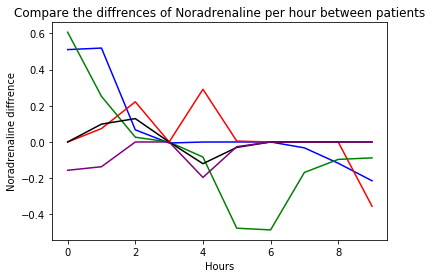

In [68]:
patient0 = nor_diff[0]
patient1 = nor_diff[1]
patient2 = nor_diff[2]
patient3 = nor_diff[3]
patient4 = nor_diff[4]
x = np.arange (0,10)

plt.title("Compare the diffrences of Noradrenaline per hour between patients")
plt.xlabel("Hours")
plt.ylabel("Noradrenaline diffrence")
plt.plot(x, patient0, color="blue")
plt.plot(x, patient1, color="red")
plt.plot(x, patient2, color="green")
plt.plot(x, patient3, color="black")
plt.plot(x, patient4, color="purple")

plt.show()